In [ ]:
import chardet
import pandas as pd
from glob import glob

In [ ]:
import seaborn as sns
import numpy as np

Montando a pasta do Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Lendo os dados que estão agrupados por ocorrência em nosso diretório

In [ ]:
caminho = '/content/drive/MyDrive/agrupados_ocorrencia'

csv_files = glob(caminho + '/*.csv')
csv_files.sort()

df_list = (pd.read_csv(file, encoding="latin1", sep=";", decimal=",") for file in csv_files)

print(csv_files)




['/content/drive/MyDrive/agrupados_ocorrencia/datatran2014.csv', '/content/drive/MyDrive/agrupados_ocorrencia/datatran2015.csv', '/content/drive/MyDrive/agrupados_ocorrencia/datatran2016.csv', '/content/drive/MyDrive/agrupados_ocorrencia/datatran2017.csv', '/content/drive/MyDrive/agrupados_ocorrencia/datatran2018.csv', '/content/drive/MyDrive/agrupados_ocorrencia/datatran2019.csv', '/content/drive/MyDrive/agrupados_ocorrencia/datatran2020.csv', '/content/drive/MyDrive/agrupados_ocorrencia/datatran2021.csv']


Lendo os dados que estão agrupados por pessoa (mais completo)

In [ ]:
caminho_2 = '/content/drive/MyDrive/agrupados_pessoa'
csv_files2 = glob(caminho_2 + '/*.csv')
csv_files2.sort()

df_list_pessoa = (pd.read_csv(file, encoding="latin1", sep=";", decimal=",") for file in csv_files2)

print(csv_files2)


['/content/drive/MyDrive/agrupados_pessoa/acidentes2014.csv', '/content/drive/MyDrive/agrupados_pessoa/acidentes2015.csv', '/content/drive/MyDrive/agrupados_pessoa/acidentes2016.csv', '/content/drive/MyDrive/agrupados_pessoa/acidentes2017.csv', '/content/drive/MyDrive/agrupados_pessoa/acidentes2018.csv', '/content/drive/MyDrive/agrupados_pessoa/acidentes2019.csv', '/content/drive/MyDrive/agrupados_pessoa/acidentes2020.csv', '/content/drive/MyDrive/agrupados_pessoa/acidentes2021.csv']


Antes de começar a mexer com os dados, vou criar algumas colunas com base na informação do estado físico da pessoa envolvida no acidente

(Não executar esse código)

In [ ]:
df_2014 = pd.read_csv('/content/drive/MyDrive/agrupados_pessoa/acidentes2014.csv', encoding="latin1", sep=";")
df_2015 = pd.read_csv('/content/drive/MyDrive/agrupados_pessoa/acidentes2015.csv', encoding="latin1", sep=";")
df_2016 = pd.read_csv('/content/drive/MyDrive/agrupados_pessoa/acidentes2014.csv', encoding="latin1", sep=";")

NameError: ignored

In [ ]:
df_2014['estado_fisico'].unique()

NameError: ignored

In [ ]:
def ileso(estado):
  return int('Ileso' in estado)


def ferido_leve(estado):
  return int('Ferido Leve' in estado)


def ferido_grave(estado):
  return int('Ferido Grave' in estado)

def morto(estado):
  return int('Morto' in estado)





  



In [ ]:
df_2014['ilesos'] = df_2014['estado_fisico'].map(ileso)
df_2014['feridos_leves'] = df_2014['estado_fisico'].map(ferido_leve)
df_2014['feridos_graves'] = df_2014['estado_fisico'].map(ferido_grave)
df_2014['mortos'] = df_2014['estado_fisico'].map(morto)

df_2015['ilesos'] = df_2015['estado_fisico'].map(ileso)
df_2015['feridos_leves'] = df_2015['estado_fisico'].map(ferido_leve)
df_2015['feridos_graves'] = df_2015['estado_fisico'].map(ferido_grave)
df_2015['mortos'] = df_2015['estado_fisico'].map(morto)

df_2016['ilesos'] = df_2016['estado_fisico'].map(ileso)
df_2016['feridos_leves'] = df_2016['estado_fisico'].map(ferido_leve)
df_2016['feridos_graves'] = df_2016['estado_fisico'].map(ferido_grave)
df_2016['mortos'] = df_2016['estado_fisico'].map(morto)


NameError: ignored

In [ ]:
df_2014.to_csv('/content/drive/MyDrive/agrupados_pessoa/novo2014.csv', encoding="latin1", sep=";", index=False)
df_2015.to_csv('/content/drive/MyDrive/agrupados_pessoa/novo2015.csv', encoding="latin1", sep=";", index=False)
df_2016.to_csv('/content/drive/MyDrive/agrupados_pessoa/novo2016.csv', encoding="latin1", sep=";", index=False)

NameError: ignored

A partir daqui os datasets criados substituirão os originais que não passaram pelo tratamento

In [ ]:
df_pessoas = pd.concat(df_list_pessoa, ignore_index=True)

In [ ]:
df_pessoas.drop(['id_veiculo', 'marca', 'ano_fabricacao_veiculo'], axis=1, inplace=True)

In [ ]:
df_pessoas.drop_duplicates(subset=['id', 'pesid'], keep="first", inplace=True)

Mostra algumas linhas do dataframe (agrupados por pessoa)

In [ ]:
df_pessoas.head(5)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,uso_solo,tipo_veiculo,tipo_envolvido,estado_fisico,idade,sexo,ilesos,feridos_leves,feridos_graves,mortos
0,8,5018708,22/11/2014,Sábado,09:35:00,PR,376,335.6,ORTIGUEIRA,Defeito mecânico em veículo,...,Rural,Automóvel,Condutor,Ileso,34.0,Masculino,1,0,0,0
2,8,5018711,22/11/2014,Sábado,09:35:00,PR,376,335.6,ORTIGUEIRA,Defeito mecânico em veículo,...,Rural,Caminhão-Trator,Condutor,Ileso,63.0,Masculino,1,0,0,0
4,8,5018714,22/11/2014,Sábado,09:35:00,PR,376,335.6,ORTIGUEIRA,Defeito mecânico em veículo,...,Rural,Caminhão,Condutor,Ileso,-1.0,Inválido,1,0,0,0
6,9,5019034,17/11/2014,Segunda,20:50:00,BA,324,530.0,FEIRA DE SANTANA,Ultrapassagem indevida,...,Urbano,Caminhonete,Condutor,Ileso,32.0,Masculino,1,0,0,0
7,12,5019124,22/11/2014,Sábado,08:30:00,SP,116,212.0,GUARULHOS,Outras,...,Urbano,Camioneta,Condutor,Ignorado,-1.0,Inválido,0,0,0,0


Informações básicas sobre o dataframe como nome das colunas e tipo de dado

In [ ]:
df_pessoas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684157 entries, 0 to 1684173
Data columns (total 27 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   id                      1684157 non-null  object
 1   pesid                   1684157 non-null  object
 2   data_inversa            1684157 non-null  object
 3   dia_semana              1684157 non-null  object
 4   horario                 1684157 non-null  object
 5   uf                      1684157 non-null  object
 6   br                      1682534 non-null  object
 7   km                      1682534 non-null  object
 8   municipio               1684157 non-null  object
 9   causa_acidente          1684157 non-null  object
 10  tipo_acidente           1684078 non-null  object
 11  classificacao_acidente  1684157 non-null  object
 12  fase_dia                1684156 non-null  object
 13  sentido_via             1684157 non-null  object
 14  condicao_metereolo

Retorna o número de tuplas (registros) e de colunas

In [ ]:
df_pessoas.shape

(1684157, 27)

In [ ]:
df_pessoas.isnull().sum()

NameError: ignored

Marca, Ano de Fabricação do Veículo e Idade são as variáveis que mais apresentam dados faltantes, portanto serão desconsideradas. As linhas com das faltantes nas colunas BR e KM também serão desconsideradas.

Número de acidentes nas rodovias conforme dados da PRF (agrupados pessoa)

In [ ]:
qtde_linhas = df_pessoas['id'].unique()

print(len(qtde_linhas))


NameError: ignored

Tratando inicialmente os dados referente ao tipo de acidente (com 79 valores nulos)

In [ ]:
df_pessoas['tipo_acidente'] = df_pessoas['tipo_acidente'].fillna('Ignorado')

NameError: ignored

Tratando idades que possuem alto percentual de valores nulos

In [ ]:
df_pessoas['idade'] = df_pessoas['idade'].fillna(-1.0)

NameError: ignored

In [ ]:
df_pessoas['idade'] = df_pessoas['idade'].astype(float)

NameError: ignored

In [ ]:
df_pessoas['idade'] = df_pessoas['idade'].astype(int)

NameError: ignored

Quantidade real de idades não identificadas

In [ ]:
print(len(df_pessoas[df_pessoas['idade'] == -1]))

NameError: ignored

Valores de idades que estiverem fora do comportamento normal serão convertidos em ignorados (-1)

In [ ]:
def converte_ignorado(x):
  if x > 100:
    return -1
  else:
    return x

In [ ]:
df_pessoas['idade'] = df_pessoas['idade'].map(converte_ignorado)

NameError: ignored

Tratamento da variável sexo, que apresenta 620 dados faltantes

In [ ]:
df_pessoas['sexo'].unique()

NameError: ignored

In [ ]:
df_pessoas.replace({'sexo':{'Inválido':'Ignorado', 'Não Informado':'Ignorado', 'M':'Masculino', 'F':'Feminino', 'I':'Ignorado'}}, inplace=True)

NameError: ignored

In [ ]:
df_pessoas['sexo'] = df_pessoas['sexo'].fillna('Ignorado')

NameError: ignored

Realizando a mudança de tipo de dado do ID da pessoa

In [ ]:
df_pessoas['pesid'] = df_pessoas['pesid'].astype(float)
df_pessoas['pesid'] = df_pessoas['pesid'].astype(int)

NameError: ignored

Realizando a mudança de tipo de dado do ID do acidente

In [ ]:
df_pessoas['id'] = df_pessoas['id'].astype(float)
df_pessoas['id'] = df_pessoas['id'].astype(int)

NameError: ignored

Realiza uma classificação da fase do dia a partir do horário (só pra não ter que apagar um único registro)

In [ ]:
df_pessoas['fase_dia'].loc[(df_pessoas['horario'] >= '06:00:00') & (df_pessoas['horario'] <= '11:59:00')] = 'Manhã'
df_pessoas['fase_dia'].loc[(df_pessoas['horario'] >='00:00:00') & (df_pessoas['horario'] <= '05:59:00')] = 'Madrugada'
df_pessoas['fase_dia'].loc[(df_pessoas['horario'] >= '12:00:00') & (df_pessoas['horario'] <= '17:59:00')] = 'Tarde'
df_pessoas['fase_dia'].loc[(df_pessoas['horario'] >= '18:00:00') & (df_pessoas['horario'] <= '23:59:00')] = 'Noite'

NameError: ignored

Finalmente, podemos dropar os valores nulos de BR e KM

In [ ]:
df_pessoas.dropna(axis=0, how="any", inplace=True)

NameError: ignored

Depois que os dados nulos de BR e KM tiverem sido tratos podemos realizar a mudança de tipo dos dados

In [ ]:
df_pessoas['br'] = df_pessoas['br'].astype(float)
df_pessoas['br'] = df_pessoas['br'].astype(int)
df_pessoas['km'] = df_pessoas['km'].astype(float)

NameError: ignored

Seleção de colunas do tipo object (string) para remoção de espaços vazios e padronização das letras para minúsculas

In [ ]:
for col in df_pessoas.select_dtypes(include=object):
  try:
    df_pessoas[col] = df_pessoas[col].apply(lambda x: x.strip().lower())
  except:
    print('Deu ruim')

NameError: ignored

Mudando o tipo de dado do campo data_inversa para datetime e criando as variáveis dia, mês e ano para facilitar a análise

In [ ]:
df_pessoas['data_inversa'] = pd.to_datetime(df_pessoas['data_inversa'])

NameError: ignored

In [ ]:
df_pessoas['ano'] = df_pessoas['data_inversa'].dt.year
df_pessoas['mes'] = df_pessoas['data_inversa'].dt.month
df_pessoas['dia'] = df_pessoas['data_inversa'].dt.day

NameError: ignored

Tratamento dos dados relacionados a condição metereológica

In [ ]:
df_pessoas['condicao_metereologica'].unique()

NameError: ignored

In [ ]:
def retira_nulls(dado):
  if dado == '(null)':
    return 'ignorada'
  return dado

In [ ]:
df_pessoas['condicao_metereologica'] = df_pessoas['condicao_metereologica'].map(retira_nulls)

In [ ]:
df_pessoas.replace({'condicao_metereologica':{'céu claro':'ceu claro', 'ignorada':'ignorado'}}, inplace=True)

Verificação de dados relativos ao estado físico dos envolvidos em acidentes de Trânsito (AT)

In [ ]:
df_pessoas['estado_fisico'].unique()

array(['ileso', 'ignorado', 'ferido leve', 'ferido grave', 'morto'],
      dtype=object)

In [ ]:
df_pessoas.replace({'estado_fisico':{'lesões leves':'ferido leve', 'lesões graves':'ferido grave', 'não informado':'ignorado', '(null)':'ignorado', 'óbito':'morto'}}, inplace=True)

Para efeitos de cálculo, acreditamos que seja melhor somar o número de feridos leves com o de feridos graves para se ter uma medida mais efetiva do total de pessoas feridas nos acidentes ocorridos entre 2014 e 2021

In [ ]:
df_pessoas['total_feridos'] = df_pessoas['feridos_leves'] + df_pessoas['feridos_graves']

Mostrando o histograma das idades

In [ ]:
import matplotlib.pyplot as plt

Delimitação do Tema e Contexto da Pesquisa

O artigo nº 9503 do Código Brasileiro de Trânsito (CTB) define trânsito como a utilização das vias por pessoas, veículos e animais, isolados ou em grupos, conduzidos ou não, para fins de circulação, parada, estacionamento e operação de carga ou descarga.

Outra definição considera que o trânsito é "conjunto de todos os deslocamentos diários, feitos pelas calçadas e vias da cidade, e que aparece na rua na forma da movimentação geral de pedestres e veículos" (VASCONCELOS, 1985, p.11)

Dados históricos da Organização Mundial de Saúde (OMS) revelam que, no mundo,morrem mais de 3,5 mil pessoas morrem todos os dias nas vias, o que somado daria aproximadamente 1,3 milhões de mortes passíveis de serem evitadas por ano e cerca de 50 milhões de pessoas lesionadas - tornando-se deste modo a maior causa de morte entre crianças e jovens. 

Países de baixa e média renda são os mais afetados. As perdas humanas, materiais e econômicas são vastas e perpassam toda a sociedade (OMS, 2021).

No Brasil, conforme a Confederação Nacional de Transporte o modal predominante é o rodoviário (CNT). Ele é responsável por 65% do volume de cargas e de 90% dos passageiros. Porém, apresenta alguns problemas relacionados à baixa infraestrutura. Apenas 12, 4% da malha rodoviária é pavimentada. E a maioria dessas rodovias é de pista simples. Em 2017, mais da metade (54%) dos acidentes com vítimas nas rodovias federais ocorreu em pistas simples de mão dupla .
Acidentes de transporte terrestre no Brasil matam cerca de 45 mil pessoas por ano segundo dados do Datasus constituindo-se uma das principais causas de morte no país. Além do custo humano, que é incalculável, o impacto econômico dos acidentes é bastante expressivo (CTN, 2018).


Tendo isso em vista, a OMS lançou em 2010, através da proclamação de uma resolução, um plano global para redução de acidentes e lesões de trânsito chamado Década de Ação pela Segurança no Trânsito (OMS, 2021).
No Brasil, o Plano Nacional de Redução de Mortes e Lesões no Trânsito (PNATRANS) foi instituído pela lei nº 13.614 de 11 de janeiro de 2014 que inclui o art.326-A no Código de Trânsito Brasileiro (CTB) e propõe um novo desafio para aos orgãos nacionais de gestão de trânsito.

ref: https://www.gov.br/infraestrutura/pt-br/assuntos/transito/arquivos-senatran/Anexo_I_pnatrans.pdf

Plotando um gráfico com a distribuição das idades das pessoas (no período em estudo)

In [ ]:
idades = df_pessoas[df_pessoas['idade'] != -1]

In [ ]:
idades['idade'].unique()

array([ 34,  63,  32,  35,  29,  45,  60,  37,  30,  33,  24,  22,  48,
        23,  58,  25,  21,  19,  38,  18,  51,  39,  27,  31,  43,  20,
        42,  26,  54,  36,  49,  44,  28,  61,  66,  65,  46,  52,  68,
        74,  83,  53,  40,  57,  56,  41,  50,  87,  59,  55,  47,  64,
        67,  78,  70,  71,  81,  77,  73,  76,  72,  62,  75,  69,  84,
        95,  79,  82,  92,  90,  85,  86,  88,  80,  89,  93,  91,  94,
        97,  98,  96, 100,  99])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


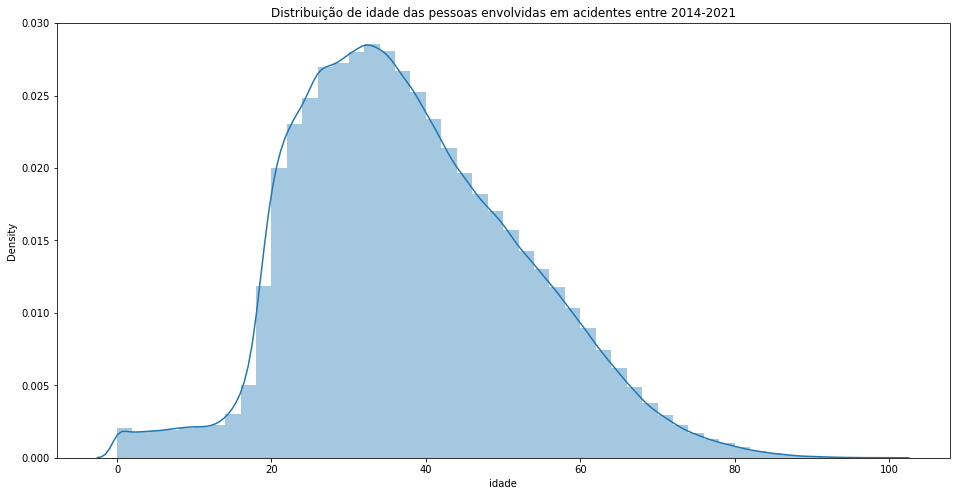

In [ ]:
plt.figure(figsize = (16, 8))
plt.title('Distribuição de idade das pessoas envolvidas em acidentes entre 2014-2021')
plt.xlabel('Idade')
#idades['idade'].dist()
sns.distplot(idades['idade'])

Idades devidamente categorizadas (Pandas Cut)

Segundo Relatório da Organização Pan-Americana da Saúde (OPAS), as pessoas que mais se envolvem em acidentes têm entre 20 e 39 anos, seguindo uma tendência global, e geralmente são do sexo masculino.

ref: https://iris.paho.org/bitstream/handle/10665.2/49709/9789275720387_por.pdf?sequence=1&isAllowed=y

In [ ]:
categoria = pd.cut(df_pessoas.idade, bins=[0, 2, 11, 20, 29, 44, 59, 74, 100], labels=['Bebê', 'Criança', 'Adolescente', 'Jovem Adulto', 'Adulto', 'Meia idade', 'Idoso', 'Velhice extrema'])

In [ ]:
df_pessoas.insert(9, "grupo_idade", categoria)

In [ ]:
df_pessoas['grupo_idade'].value_counts()

Adulto             559275
Jovem Adulto       329227
Meia idade         321708
Idoso              109228
Adolescente         92156
Criança             26020
Velhice extrema     15100
Bebê                 5136
Name: grupo_idade, dtype: int64

Porcentagem de cada grupo

In [ ]:
df_total = df_pessoas.shape[0]

In [ ]:
perc_bebe = (df_pessoas['id'][df_pessoas['grupo_idade'] == 'Bebê'].count() / df_total)* 100

In [ ]:
perc_crianca = (df_pessoas['id'][df_pessoas['grupo_idade'] == 'Criança'].count() / df_total)* 100

In [ ]:
perc_adolescente = (df_pessoas['id'][df_pessoas['grupo_idade'] == 'Adolescente'].count() / df_total)* 100

In [ ]:
perc_jovem_adulto = (df_pessoas['id'][df_pessoas['grupo_idade'] == 'Jovem Adulto'].count() / df_total)* 100

In [ ]:
perc_adulto = (df_pessoas['id'][df_pessoas['grupo_idade'] == 'Adulto'].count() / df_total)* 100

In [ ]:
perc_meia = (df_pessoas['id'][df_pessoas['grupo_idade'] == 'Meia idade'].count() / df_total)* 100

In [ ]:
perc_idoso = (df_pessoas['id'][df_pessoas['grupo_idade'] == 'Idoso'].count() / df_total)* 100

In [ ]:
perc_velhice = (df_pessoas['id'][df_pessoas['grupo_idade'] == 'Velhice extrema'].count() / df_total)* 100

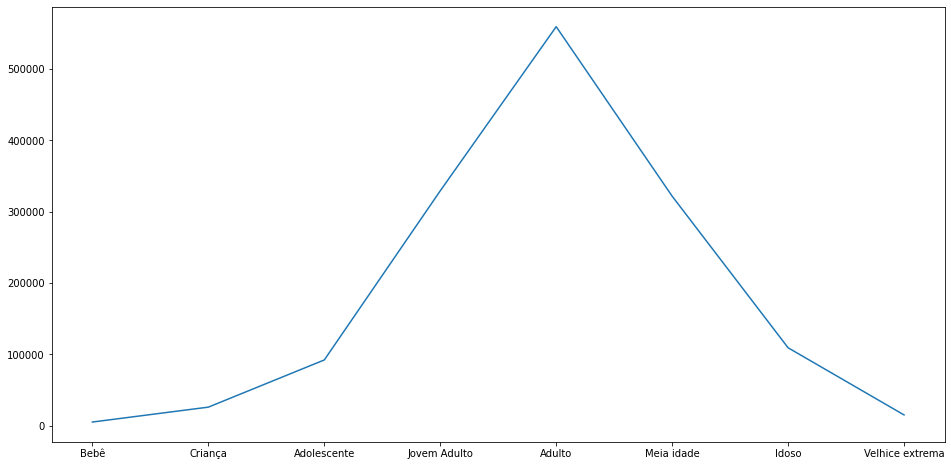

In [ ]:
df_pessoas['grupo_idade'].value_counts(sort=False).plot(figsize=(16, 8))

Estado físico dos envolvidos em acidentes na rodovia BR-101 no período estudado

É possível verificar através do gráfico abaixo que há uma queda considerável no número de pessoas envolvidas em acidentes que permaneceram ilesas e uma tendência a se aproximar do número de feridos leves. Por outro lado, parece existir uma estreita relação entre as ocorrência de feridos graves e a ocorrência de óbitos.

In [ ]:
rodovia = df_pessoas.loc[(df_pessoas['br'] == 101) & (df_pessoas['estado_fisico'] != 'ignorado')]

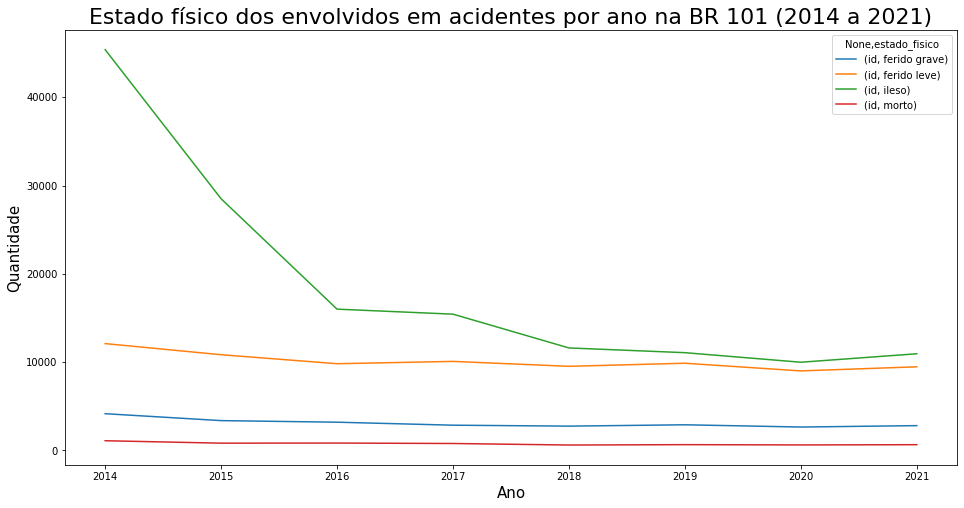

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
rodovia.groupby([rodovia['ano'], rodovia['estado_fisico']]).agg({'id':'count'}).unstack().plot(ax=ax)
ax.set_alpha(0.8)
ax.set_title("Estado físico dos envolvidos em acidentes por ano na BR 101 (2014 a 2021)", fontsize=22)
ax.set_ylabel("Quantidade", fontsize=15);
ax.set_xlabel("Ano", fontsize=15);
plt.show()

Distribuição de ocorrências de veículos conforme art. 96 do CTB para a rodovia BR-101

In [ ]:
df_pessoas['tipo_veiculo'].unique()

array(['automóvel', 'caminhão-trator', 'caminhão', 'caminhonete',
       'camioneta', 'não identificado', 'ciclomotor', 'motocicleta',
       'motoneta', 'ônibus', 'microônibus', 'bicicleta', 'utilitário',
       'trator de rodas', 'trator de esteiras', 'semi-reboque',
       'caminhão-tanque', 'triciclo', 'carroça', 'reboque', 'charrete',
       'trator misto', 'carro de mão', 'bonde', 'quadriciclo', 'side-car',
       'motor-casa', 'semirreboque', 'chassi-plataforma',
       'trator de esteira'], dtype=object)

In [ ]:
df_pessoas.replace({'tipo_veiculo':{'(null)':'não identificado', 'carro-de-mao': 'carro de mão', 'carroça-charrete':'charrete', 'bonde / trem':'bonde', 'trem-bonde':'bonde', 'motocicletas':'motocicleta', 'outros': 'não identificado', 'não informado': 'não identificado', 'semireboque': 'semirreboque', 'micro-ônibus':'microônibus'}}, inplace=True)

In [ ]:
def caracteriza_veiculo(tipo_veiculo):
  if tipo_veiculo in ['bicicleta', 'ciclomotor', 'motocicleta', 'triciclo', 'quadriciclo', 'motoneta', 'automóvel', 'microônibus', 'ônibus', 'bonde', 'charrete']:
    return 'passageiros'
  elif tipo_veiculo in ['caminhonete', 'caminhão', 'reboque', 'semirreboque', 'carroça', 'carro de mão']:
    return 'carga'
  elif tipo_veiculo in ['utilitário', 'camioneta']:
    return 'misto'
  elif tipo_veiculo in ['trator de rodas', 'trator de esteiras', 'trator misto', 'caminhão-trator']:
    return 'tração'
  else:
    return 'não identificado'

In [ ]:
selected_rows = df_pessoas.loc[df_pessoas['br'] == 101]

In [ ]:
row_anos = selected_rows[(selected_rows['ano'] >= 2014) & (selected_rows['ano'] <= 2021)]

In [ ]:
dados_sem_ignorados = row_anos.loc[row_anos['tipo_veiculo'] != 'não identificado']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


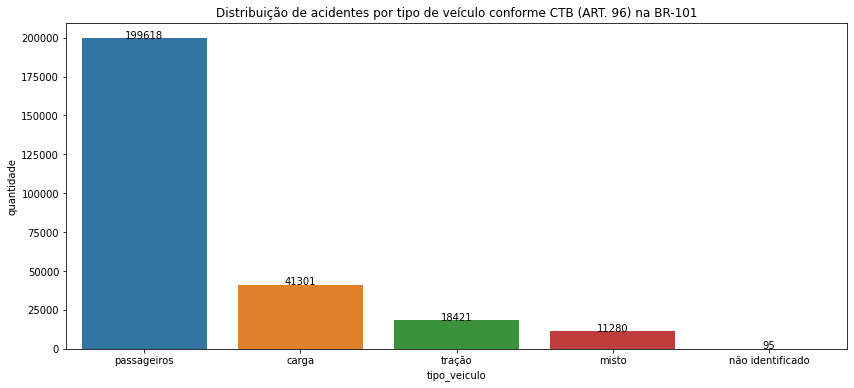

In [ ]:
dados_sem_ignorados['tipo_veiculo'] = dados_sem_ignorados['tipo_veiculo'].map(caracteriza_veiculo)
dist = dados_sem_ignorados['tipo_veiculo'].value_counts().to_frame().reset_index()
dist.rename(columns = {'index':'tipo_veiculo', 'tipo_veiculo':'quantidade'}, inplace=True)
def addRotulos(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig, ax = plt.subplots(figsize=(14, 6))
plt.title('Distribuição de ocorrências por tipo de veículo conforme CTB (ART. 96) na BR-101')
grap = sns.barplot(x = 'tipo_veiculo', y='quantidade', data=dist)
addRotulos(dist['tipo_veiculo'], dist['quantidade'])


Quantidade de pessoas envolvidas em acidentes na rodovia BR-101 agrupadas por sexo

In [ ]:
dados_pessoas = df_pessoas.loc[df_pessoas['br'] == 101]

In [ ]:
quantidade_envolvidos_sexo = dados_pessoas.groupby(['sexo'])['id'].size().sort_values(ascending = False)

In [ ]:
envolvidos_total = dados_pessoas['pesid'].count()

In [ ]:
quantidade_envolvidos_sexo

sexo
masculino    206577
feminino      53494
ignorado      15057
Name: id, dtype: int64

In [ ]:
percentual_masc = (206577/envolvidos_total) * 100

In [ ]:
print('Homens correspondem a %.2f %%' %percentual_masc)

Homens correspondem a 75.08 %


In [ ]:
percentual_fem = (53494/envolvidos_total) * 100

In [ ]:
print('Mulheres correspondem a %.2f %%' %percentual_fem)

Mulheres correspondem a 19.44 %


In [ ]:
percentual_ignorado = (15057/envolvidos_total) * 100

In [ ]:
print('Número de ignorados corresponde a %.2f %%' %percentual_ignorado)

Número de ignorados corresponde a 5.47 %


Os dados acima nos mostram que 75% das pessoas envolvidas em acidentes na rodovia BR-101 eram do sexo masculino, enquanto 20% eram do sexo femino e 5% representam dados não coletados pela Polícia Rodoviária Federal por alguma razão.

Tipo de condutor envolvido na contagem de envolvidos em acidentes na rodovia BR-101

In [ ]:
envolvidos = df_pessoas.loc[df_pessoas['br'] == 101]

In [ ]:
contagem_por_categoria = envolvidos['tipo_envolvido'].value_counts()

In [ ]:
contagem_por_categoria

condutor      217138
passageiro     50205
pedestre        5541
testemunha      2192
cavaleiro         52
Name: tipo_envolvido, dtype: int64

In [ ]:
envolvido_condutor= (217138/envolvidos_total) * 100
envolvido_passageiro = (50205/envolvidos_total) * 100
envolvido_pedestre = (5541/envolvidos_total) * 100

In [ ]:
print('Condutores envolvidos em acidentes %.2f %%' %envolvido_condutor)
print('Passageiros envolvidos ema acidentes %.2f %%' %envolvido_passageiro)
print('Pedestres envolvidos em acidentes %.2f %%' %envolvido_pedestre)

Condutores envolvidos em acidentes 78.92 %
Passageiros envolvidos ema acidentes 18.25 %
Pedestres envolvidos em acidentes 2.01 %


Como podemos notar facilmente, a maioria dos acidentes se dá com maior presença entre envolvidos que são condutores. Sendo que 79% dos envolvidos se envolveram em acidentes na condição de condutores ativos. 

Podemos verificar a predominância masculina quando cruzamos dados referentes ao sexo e tipo envolvido na ocorrência de acidentes

In [ ]:
envolvidos_sexo = df_pessoas[df_pessoas['br'] == 101]

In [ ]:
envolvidos_sexo.groupby(['sexo', 'tipo_envolvido'])['tipo_envolvido'].count()

sexo       tipo_envolvido
feminino   cavaleiro              1
           condutor           23892
           passageiro         28156
           pedestre            1445
ignorado   cavaleiro              2
           condutor           12143
           passageiro           605
           pedestre             115
           testemunha          2192
masculino  cavaleiro             49
           condutor          181103
           passageiro         21444
           pedestre            3981
Name: tipo_envolvido, dtype: int64

Número total de mortos no período entre 2014 e 2015 (Com pouquíssima margem de erro)

In [ ]:
df_pessoas['mortos'].sum()

49027

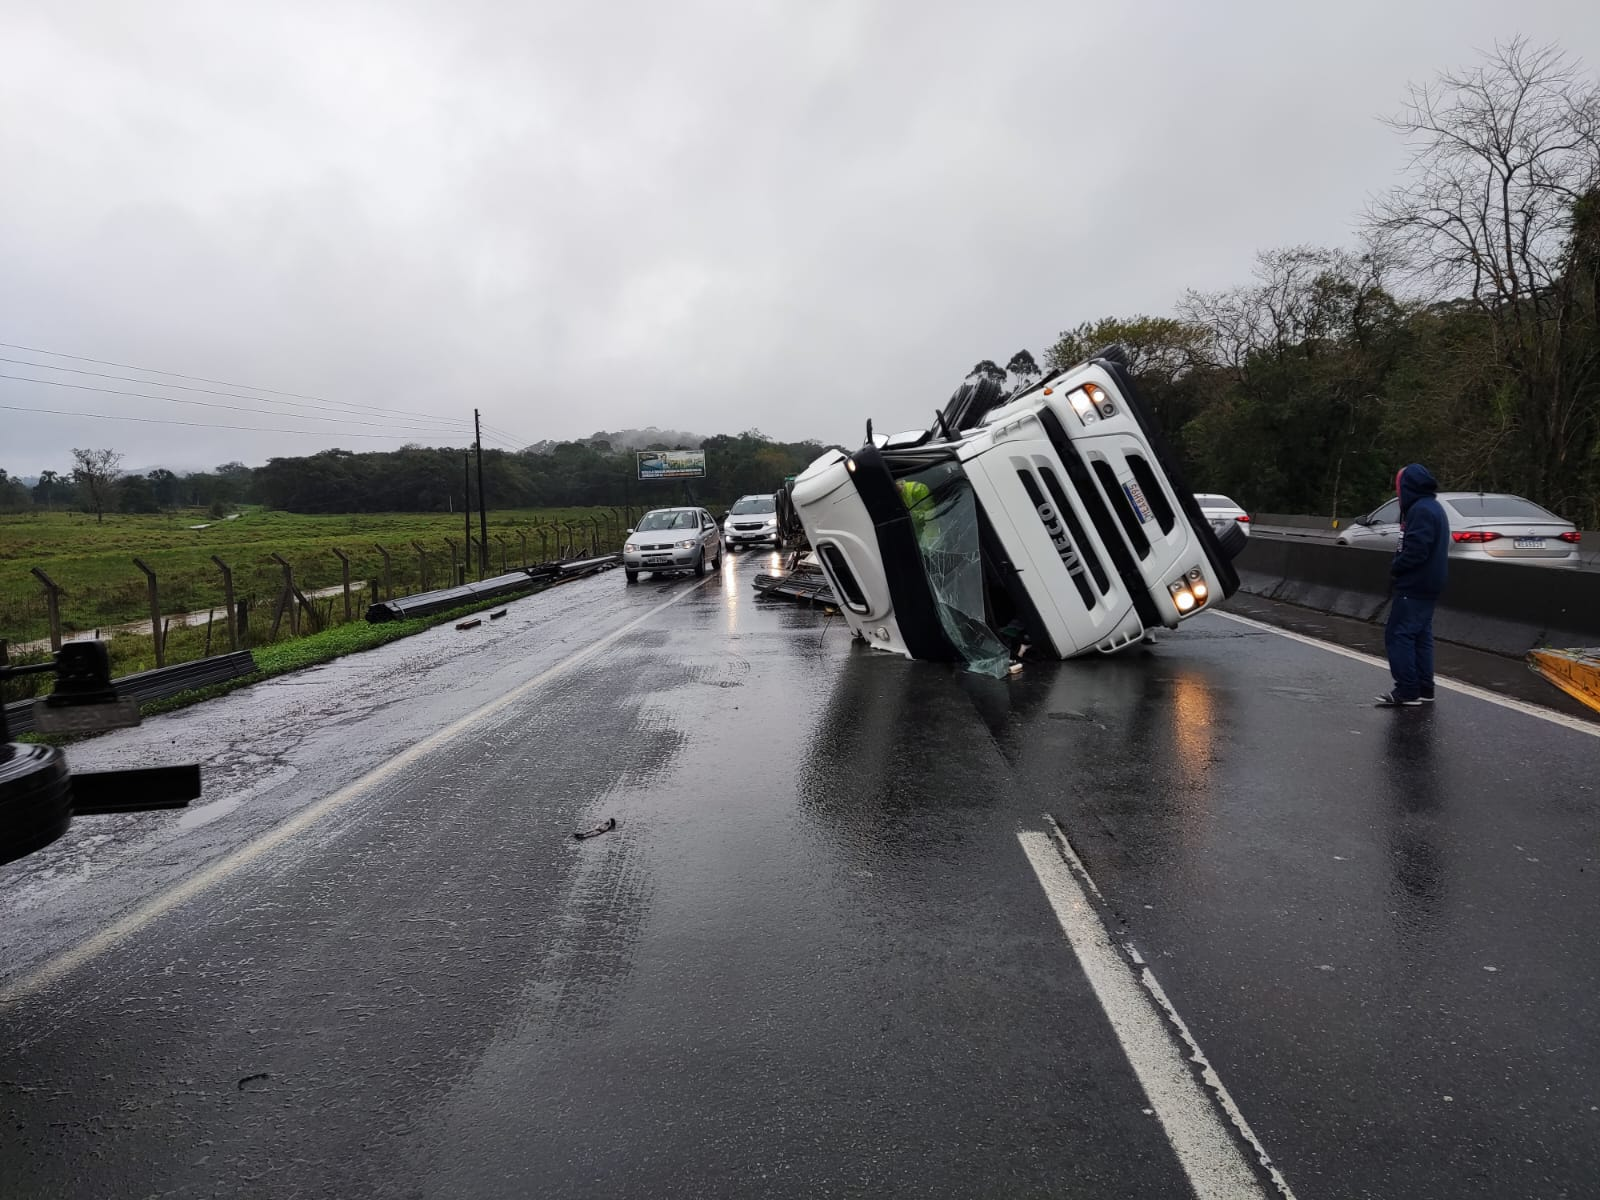

Concatenando os dataframes (referentes aos dados de ocorrência) de cada arquivo salvos em df_list

In [ ]:
df_acidentes = pd.concat(df_list, ignore_index=True)

Lendo as primeiras linhas do dataframe com dados reunidos de 2014 a 2021

In [ ]:
df_acidentes.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,Unnamed: 25,Unnamed: 26
0,1175.0,22/11/2014,Sábado,19:20:00,BA,116.0,778.1,PLANALTO,Ingestão de álcool,Atropelamento de pessoa,...,2,0,0,1,1,0,1,1,NaN,NaN
1,12.0,22/11/2014,Sábado,08:30:00,SP,116.0,212,GUARULHOS,Outras,Colisão com objeto fixo,...,1,0,0,0,0,1,0,1,NaN,NaN
2,13.0,20/11/2014,Quinta,09:30:00,BA,367.0,31.6,PORTO SEGURO,Outras,Saída de Pista,...,1,0,1,0,0,0,1,1,NaN,NaN
3,14.0,09/11/2014,Domingo,22:50:00,SC,101.0,220.9,PALHOCA,Falta de atenção,Colisão com objeto fixo,...,1,0,1,0,0,0,1,1,NaN,NaN
4,15.0,19/11/2014,Quarta,05:00:00,RJ,116.0,211,SEROPEDICA,Outras,Atropelamento de pessoa,...,1,0,0,0,1,0,0,1,NaN,NaN


Retirando as colunas com Unnamed como rótulo

In [ ]:
df_acidentes.drop(df_acidentes.filter(regex = 'Unname'), axis=1, inplace=True)

Mostrando novamente o dataframe

In [ ]:
df_acidentes

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,1175.0,22/11/2014,Sábado,19:20:00,BA,116.0,778.1,PLANALTO,Ingestão de álcool,Atropelamento de pessoa,...,Reta,Urbano,2,0,0,1,1,0,1,1
1,12.0,22/11/2014,Sábado,08:30:00,SP,116.0,212,GUARULHOS,Outras,Colisão com objeto fixo,...,Reta,Urbano,1,0,0,0,0,1,0,1
2,13.0,20/11/2014,Quinta,09:30:00,BA,367.0,31.6,PORTO SEGURO,Outras,Saída de Pista,...,Reta,Rural,1,0,1,0,0,0,1,1
3,14.0,09/11/2014,Domingo,22:50:00,SC,101.0,220.9,PALHOCA,Falta de atenção,Colisão com objeto fixo,...,Reta,Urbano,1,0,1,0,0,0,1,1
4,15.0,19/11/2014,Quarta,05:00:00,RJ,116.0,211,SEROPEDICA,Outras,Atropelamento de pessoa,...,Reta,Urbano,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742241,465833.0,17/11/2021,quarta-feira,19:00:00,MG,262.0,451.3,NOVA SERRANA,Transitar no acostamento,Colisão transversal,...,Desvio Temporário,Não,2,0,1,0,1,0,1,2
742242,465953.0,27/10/2021,quarta-feira,18:20:00,MG,116.0,706.4,MURIAE,Acessar a via sem observar a presença dos outr...,Colisão lateral mesmo sentido,...,Curva,Sim,5,0,2,0,1,2,2,2
742243,465955.0,28/10/2021,quinta-feira,08:50:00,RJ,116.0,169.5,SAO JOAO DE MERITI,Condutor deixou de manter distância do veículo...,Colisão lateral mesmo sentido,...,Reta,Sim,2,0,1,0,1,0,1,2
742244,465965.0,07/11/2021,domingo,20:15:00,SP,116.0,318.0,JUQUITIBA,Transitar no acostamento,Atropelamento de Pedestre,...,Reta,Não,2,0,0,2,0,0,2,1


Contabilizando o número de linhas e colunas do dataframe

In [ ]:
l, c  = df_acidentes.shape
print(f'Linhas: {l} colunas: {c}')

Linhas: 742246 colunas: 25


In [ ]:
lista_df = df_acidentes['id'].unique()
print(len(lista_df))

742227


In [ ]:
df_acidentes.drop_duplicates(keep="first", inplace=True)

Verificação de valores ausentes nos dados reunidos dos boletins de ocorrência da Polícia Rodoviária Federal (PRF).

In [ ]:
(df_acidentes.isnull().sum() / df_acidentes.shape[0]) * 100

id                        0.000000
data_inversa              0.000000
dia_semana                0.000000
horario                   0.000000
uf                        0.000000
br                        0.092287
km                        0.092287
municipio                 0.000000
causa_acidente            0.000000
tipo_acidente             0.000000
classificacao_acidente    0.000000
fase_dia                  0.000000
sentido_via               0.000000
condicao_metereologica    0.000000
tipo_pista                0.000000
tracado_via               0.000000
uso_solo                  0.000000
pessoas                   0.000000
mortos                    0.000000
feridos_leves             0.000000
feridos_graves            0.000000
ilesos                    0.000000
ignorados                 0.000000
feridos                   0.000000
veiculos                  0.000000
dtype: float64

Aqui tanto BR quanto UF apresentam, arrendondando-se os valores, um percentual de 9% de dados faltantes, o que pode prejudicar a nossa análise, portanto seria interessante optar pela exclusão das linhas referentes a esses dados. Fase do dia possui 0.5% de dados faltantes que podem ser preenchidos segundo a coluna horario. Em relação, aos dados da classificação do acidente, fase do dia e condição metereológica podemos optar por tratá-los com algum algoritmo de substituição. 

Distribuição estatística dos dados 

In [ ]:
df_acidentes.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,7.422460e+05,741561.000000,742246.000000,742246.000000,742246.000000,742246.000000,742246.000000,742246.000000,742246.000000,742246.000000
mean,4.362294e+07,212.681336,2.269004,0.066075,0.675333,0.215550,1.192334,0.119688,0.890883,1.684805
std,4.152005e+07,129.467400,1.740032,0.310399,1.045053,0.569848,1.370494,0.432400,1.201259,0.744234
min,8.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.139452e+05,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,8.314175e+07,158.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,8.333486e+07,324.000000,3.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000
max,8.352989e+07,931.000000,91.000000,21.000000,58.000000,31.000000,73.000000,67.000000,66.000000,25.000000


Preencher os dados da classificação que estiverem nulos com 'Ignorado'

In [ ]:
df_acidentes['classificacao_acidente'] = df_acidentes['classificacao_acidente'].fillna('Ignorado')

In [ ]:
df_acidentes.loc[df_acidentes['classificacao_acidente'] == '(null)', 'classificacao_acidente'] = 'Ignorado' 

In [ ]:
df_acidentes['classificacao_acidente'].unique()

array(['Ignorado', 'Sem Vítimas', 'Com Vítimas Feridas',
       'Com Vítimas Fatais'], dtype=object)

Preencher os dados do tipo de acidente que estiverem nulos como 'Outros'

In [ ]:
df_acidentes['tipo_acidente'] = df_acidentes.tipo_acidente.fillna('Outros')

Preencher os dados do fase do dia conforme a variável horário. 

In [ ]:
df_acidentes['fase_dia'].loc[(df_acidentes['horario'] >= '06:00:00') & (df_acidentes['horario'] <= '11:59:00')] = 'Manhã'
df_acidentes['fase_dia'].loc[(df_acidentes['horario'] >='00:00:00') & (df_acidentes['horario'] <= '05:59:00')] = 'Madrugada'
df_acidentes['fase_dia'].loc[(df_acidentes['horario'] >= '12:00:00') & (df_acidentes['horario'] <= '17:59:00')] = 'Tarde'
df_acidentes['fase_dia'].loc[(df_acidentes['horario'] >= '18:00:00') & (df_acidentes['horario'] <= '23:59:00')] = 'Noite'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#df_acidentes.loc[df_acidentes['fase_dia'] == '(null)', 'fase_dia'] = 'Pleno dia'

In [ ]:
#df_acidentes['fase_dia'] = df_acidentes['fase_dia'].fillna('Pleno dia')

In [ ]:
df_acidentes['fase_dia'].unique()

array(['Noite', 'Manhã', 'Madrugada', 'Tarde'], dtype=object)

Preenchendo os valores de condição metereológica com 'Ignorado'

In [ ]:
df_acidentes['condicao_metereologica'] = df_acidentes['condicao_metereologica'].fillna('Ignorado')

In [ ]:
df_acidentes.loc[df_acidentes['condicao_metereologica'] == '(null)', 'condicao_metereologica'] = 'Ignorado'

In [ ]:
df_acidentes['condicao_metereologica'].unique()

array(['Nevoeiro/neblina', 'Sol', 'Nublado', 'Ceu Claro', 'Chuva',
       'Ignorada', 'Vento', 'Granizo', 'Neve', 'Ignorado',
       'Chuva               ', 'Garoa/Chuvisco      ',
       'Céu Claro           ', 'Nublado             ',
       'Ignorado            ', 'Nevoeiro/Neblina    ',
       'Sol                 ', 'Vento               ',
       'Granizo             ', 'Neve                ', 'Céu Claro',
       'Garoa/Chuvisco', 'Nevoeiro/Neblina'], dtype=object)

In [ ]:
df_acidentes.replace({'condicao_metereologica':{'céu claro':'ceu claro', 'ignorada':'ignorado'}}, inplace=True)

In [ ]:
df_acidentes.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,7.422460e+05,741561.000000,742246.000000,742246.000000,742246.000000,742246.000000,742246.000000,742246.000000,742246.000000,742246.000000
mean,4.362294e+07,212.681336,2.269004,0.066075,0.675333,0.215550,1.192334,0.119688,0.890883,1.684805
std,4.152005e+07,129.467400,1.740032,0.310399,1.045053,0.569848,1.370494,0.432400,1.201259,0.744234
min,8.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.139452e+05,101.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,8.314175e+07,158.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,8.333486e+07,324.000000,3.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000
max,8.352989e+07,931.000000,91.000000,21.000000,58.000000,31.000000,73.000000,67.000000,66.000000,25.000000


Mostrando o tipo das variáveis

In [ ]:
df_acidentes.dtypes

id                        float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
dtype: object

Como se pode observar alguns tipos não fazem sentido para o dado que almejam representar. Exemplo: id mapeado como float. O ideal é mudar o tipo de todos eles para facilitar a nossa vida. 

Remove os valores nulos. Qualquer linha com um valor nulo será excluída.



In [ ]:
df_acidentes.dropna(axis=0, inplace=True)

Mudar o tipo de dado incorreto de algumas variáveis/colunas

In [ ]:
df_acidentes['id'] = df_acidentes['id'].astype(int)
df_acidentes['br'] = df_acidentes['br'].astype(int)
#df_acidentes['km'] = df_acidentes['km'].str.replace(',', '.').apply(float)
df_acidentes['km'] = df_acidentes['km'].astype(float)

Função para retirar o "feira" de dias da semana, colocar tudo em letras minúsculas e retirar espaços vazios. Ex: Segunda-feira.

In [ ]:
def retira_feira(dia_semana):
  dado = dia_semana.strip().lower().split('-')[0]
  return dado

In [ ]:
df_acidentes['dia_semana'] = df_acidentes['dia_semana'].map(retira_feira)

In [ ]:
df_acidentes['dia_semana']

0          sábado
1          sábado
2          quinta
3         domingo
4          quarta
           ...   
742241     quarta
742242     quarta
742243     quinta
742244    domingo
742245     quarta
Name: dia_semana, Length: 741561, dtype: object

In [ ]:
df_acidentes.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,1175,22/11/2014,sábado,19:20:00,BA,116,778.1,PLANALTO,Ingestão de álcool,Atropelamento de pessoa,...,Reta,Urbano,2,0,0,1,1,0,1,1
1,12,22/11/2014,sábado,08:30:00,SP,116,212.0,GUARULHOS,Outras,Colisão com objeto fixo,...,Reta,Urbano,1,0,0,0,0,1,0,1
2,13,20/11/2014,quinta,09:30:00,BA,367,31.6,PORTO SEGURO,Outras,Saída de Pista,...,Reta,Rural,1,0,1,0,0,0,1,1
3,14,09/11/2014,domingo,22:50:00,SC,101,220.9,PALHOCA,Falta de atenção,Colisão com objeto fixo,...,Reta,Urbano,1,0,1,0,0,0,1,1
4,15,19/11/2014,quarta,05:00:00,RJ,116,211.0,SEROPEDICA,Outras,Atropelamento de pessoa,...,Reta,Urbano,1,0,0,0,1,0,0,1


Tratamento de município

Aqui retiramos espaços antes e depois da string e tratamos a existência de valores nulos (null)

In [ ]:
def tranformaString(dado):
  dado = dado.strip().lower()
  return dado

In [ ]:
df_acidentes['municipio'] = df_acidentes['municipio'].map(tranformaString)

In [ ]:
df_acidentes.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,1175,22/11/2014,sábado,19:20:00,BA,116,778.1,planalto,Ingestão de álcool,Atropelamento de pessoa,...,Reta,Urbano,2,0,0,1,1,0,1,1
1,12,22/11/2014,sábado,08:30:00,SP,116,212.0,guarulhos,Outras,Colisão com objeto fixo,...,Reta,Urbano,1,0,0,0,0,1,0,1
2,13,20/11/2014,quinta,09:30:00,BA,367,31.6,porto seguro,Outras,Saída de Pista,...,Reta,Rural,1,0,1,0,0,0,1,1
3,14,09/11/2014,domingo,22:50:00,SC,101,220.9,palhoca,Falta de atenção,Colisão com objeto fixo,...,Reta,Urbano,1,0,1,0,0,0,1,1
4,15,19/11/2014,quarta,05:00:00,RJ,116,211.0,seropedica,Outras,Atropelamento de pessoa,...,Reta,Urbano,1,0,0,0,1,0,0,1


Tratando a coluna causa_acidente

In [ ]:
df_acidentes['causa_acidente'].unique()

array(['Ingestão de álcool', 'Outras', 'Falta de atenção',
       'Defeito mecânico em veículo', 'Desobediência à sinalização',
       'Não guardar distância de segurança', 'Animais na Pista',
       'Dormindo', 'Velocidade incompatível', 'Defeito na via',
       'Ultrapassagem indevida',
       'Fenômenos da Natureza                                                                               ',
       'Falta de Atenção à Condução                                                                         ',
       'Animais na Pista                                                                                    ',
       'Avarias e/ou desgaste excessivo no pneu                                                             ',
       'Ingestão de Álcool                                                                                  ',
       'Defeito Mecânico no Veículo                                                                         ',
       'Desobediência às normas de trânsito 

In [ ]:
df_acidentes.replace({'causa_acidente':{'falta de atenção à condução':'falta de atenção', \
'avarias e/ou desgaste excessivo no pneu':'defeito mecânico em veículo', 'deficiência ou não acionamento do sistema de iluminação/sinalização do veículo':'defeito mecânico em veículo', \
'problema com o freio':'defeito mecânico em veículo', 'problema na suspensão':'defeito mecânico em veículo', 'faróis desregulados':'defeito mecânico em veículo'}}, inplace=True)

In [ ]:
df_acidentes['causa_acidente'] = df_acidentes['causa_acidente'].map(tranformaString)

In [ ]:
df_acidentes.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,1175,22/11/2014,sábado,19:20:00,BA,116,778.1,planalto,ingestão de álcool,Atropelamento de pessoa,...,Reta,Urbano,2,0,0,1,1,0,1,1
1,12,22/11/2014,sábado,08:30:00,SP,116,212.0,guarulhos,outras,Colisão com objeto fixo,...,Reta,Urbano,1,0,0,0,0,1,0,1
2,13,20/11/2014,quinta,09:30:00,BA,367,31.6,porto seguro,outras,Saída de Pista,...,Reta,Rural,1,0,1,0,0,0,1,1
3,14,09/11/2014,domingo,22:50:00,SC,101,220.9,palhoca,falta de atenção,Colisão com objeto fixo,...,Reta,Urbano,1,0,1,0,0,0,1,1
4,15,19/11/2014,quarta,05:00:00,RJ,116,211.0,seropedica,outras,Atropelamento de pessoa,...,Reta,Urbano,1,0,0,0,1,0,0,1


Tratando a coluna tipo_acidente

In [ ]:
df_acidentes['tipo_acidente'] = df_acidentes['tipo_acidente'].map(tranformaString)

In [ ]:
df_acidentes.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
0,1175,22/11/2014,sábado,19:20:00,BA,116,778.1,planalto,ingestão de álcool,atropelamento de pessoa,...,Reta,Urbano,2,0,0,1,1,0,1,1
1,12,22/11/2014,sábado,08:30:00,SP,116,212.0,guarulhos,outras,colisão com objeto fixo,...,Reta,Urbano,1,0,0,0,0,1,0,1
2,13,20/11/2014,quinta,09:30:00,BA,367,31.6,porto seguro,outras,saída de pista,...,Reta,Rural,1,0,1,0,0,0,1,1
3,14,09/11/2014,domingo,22:50:00,SC,101,220.9,palhoca,falta de atenção,colisão com objeto fixo,...,Reta,Urbano,1,0,1,0,0,0,1,1
4,15,19/11/2014,quarta,05:00:00,RJ,116,211.0,seropedica,outras,atropelamento de pessoa,...,Reta,Urbano,1,0,0,0,1,0,0,1


In [ ]:
df_acidentes['fase_dia'] = df_acidentes['fase_dia'].map(tranformaString)

Tratando a classificação do acidente

In [ ]:
df_acidentes['classificacao_acidente'] = df_acidentes['classificacao_acidente'].map(tranformaString)

Tratando a variável sentido de via

In [ ]:
df_acidentes['sentido_via'] = df_acidentes['sentido_via'].map(tranformaString)

Tratando a variável condição metereológica

In [ ]:
df_acidentes['condicao_metereologica'] = df_acidentes['condicao_metereologica'].map(tranformaString)

Tratando a variável tipo de pista

In [ ]:
df_acidentes['tipo_pista'] = df_acidentes['tipo_pista'].map(tranformaString)

Tratando a variável traçado de via

In [ ]:
df_acidentes['tracado_via'] = df_acidentes['tracado_via'].map(tranformaString)

Tratando a variável uso de solo

In [ ]:
df_acidentes['uso_solo'] = df_acidentes['uso_solo'].map(tranformaString)

Criação da coluna Ano

In [ ]:
df_acidentes['data_inversa'] = pd.to_datetime(df_acidentes['data_inversa'], dayfirst=True)

In [ ]:
df_acidentes['ano'] = df_acidentes['data_inversa'].dt.year
df_acidentes['mes'] = df_acidentes['data_inversa'].dt.month
df_acidentes['dia'] = df_acidentes['data_inversa'].dt.day

In [ ]:
df_acidentes['ano']

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
742241    2021
742242    2021
742243    2021
742244    2021
742245    2021
Name: ano, Length: 741561, dtype: int64

Criando uma coluna com a soma do número de feridos leves e do número de feridos graves

In [ ]:
df_acidentes['total_feridos'] = df_acidentes['feridos_leves'] + df_acidentes['feridos_graves']

Análise Exploratória dos dados

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [ ]:
def addRotulos(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [ ]:
acidentesPorAno = pd.DataFrame(df_acidentes.groupby(['ano'])['id'].count())

In [ ]:
acidentesPorAno.reset_index(inplace=True)

A partir da análise visual do gráfico abaixo percebe-se uma clara diminuição no número de acidentes entre 2014 e 2021. Fica claro também um pequeno aumento  dos acidentes em 2021 com relação a 2020.

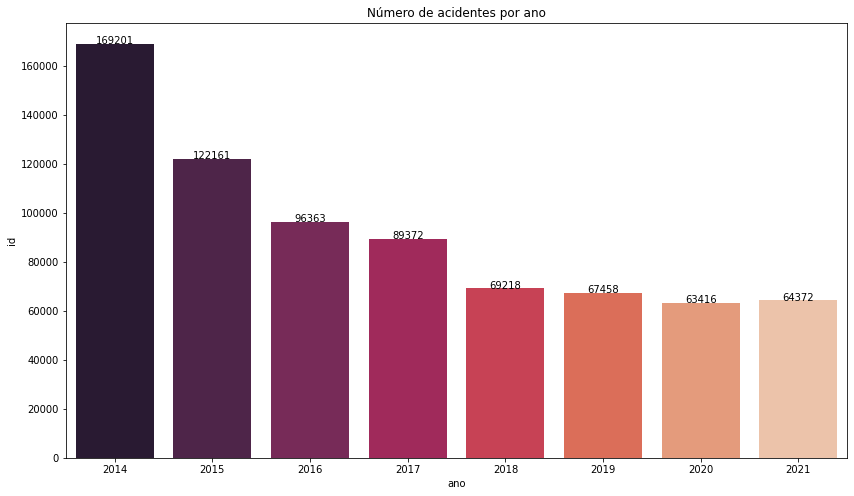

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_title('Número de acidentes por ano')
ax.set_ylabel('Número de acidentes')
ax.set_xlabel('Ano')
p = sns.barplot(data = acidentesPorAno, x='ano', y='id', palette='rocket')
addRotulos(acidentesPorAno['ano'], acidentesPorAno['id'])



Tipo de acidente mais comum ou com maior ocorrência

In [ ]:
df_acidentes['tipo_acidente'].unique()

array(['atropelamento de pedestre', 'colisão com objeto estático',
       'saída de pista', 'colisão traseira', 'colisão transversal',
       'atropelamento de animal', 'colisão frontal', 'incêndio',
       'colisão lateral', 'queda de motocicleta / bicicleta / veículo',
       'capotamento', 'tombamento', 'colisão com bicicleta',
       'colisão com objeto móvel', 'derramamento de carga',
       'danos eventuais', 'queda de ocupante de veículo',
       'saída de leito carroçável', 'engavetamento', 'outros',
       'colisão lateral mesmo sentido', 'colisão com objeto',
       'colisão lateral sentido oposto'], dtype=object)

In [ ]:
df_acidentes.replace({'tipo_acidente':{'atropelamento de pessoa':'atropelamento de pedestre', 'colisão com objeto em movimento':'colisão com objeto móvel', 'colisão com objeto fixo':'colisão com objeto estático', 'eventos atípicos':'outros'}}, inplace=True)

In [ ]:
acidente_tipo = df_acidentes['tipo_acidente'].value_counts().to_frame().reset_index()

In [ ]:
acidente_tipo

,index,tipo_acidente
0,colisão traseira,164736
1,colisão lateral,91523
2,colisão transversal,85091
3,saída de pista,61266
4,saída de leito carroçável,58398
5,colisão com objeto estático,45105
6,tombamento,45070
7,colisão frontal,40558
8,capotamento,35066
9,atropelamento de pedestre,27447


Existem algumas classificações redundantes (que podem ser reduzidas através do método replace)

In [ ]:
acidente_tipo.rename(columns = {'index':'tipo_acidente', 'tipo_acidente':'quantidade'}, inplace=True)

In [ ]:
acidente_tipo

,tipo_acidente,quantidade
0,colisão traseira,164736
1,colisão lateral,91523
2,colisão transversal,85091
3,saída de pista,61266
4,saída de leito carroçável,58398
5,colisão com objeto estático,45105
6,tombamento,45070
7,colisão frontal,40558
8,capotamento,35066
9,atropelamento de pedestre,27447


A visualização dos dados no mostra que o tipo mais comum de acidente é a colisão traseira.

[Text(0.5, 1.0, 'Distribuição de acidentes por tipo')]

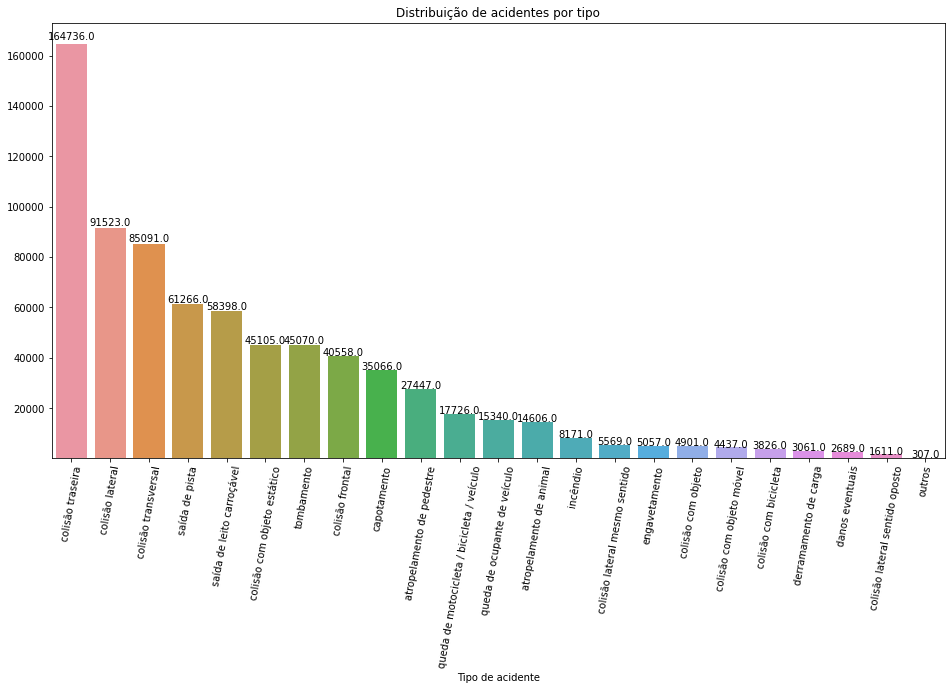

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
fig = sns.barplot(data=acidente_tipo, x='tipo_acidente', y='quantidade')
show_values(fig)
fig.axis(ymin=320)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
ax.set(ylabel="")
ax.set(xlabel="Tipo de acidente")
ax.set(title="Distribuição de acidentes por tipo")



Causas mais comuns de acidentes em rodovias brasileiras

In [ ]:
numero_mortos = df_acidentes.groupby('ano')['mortos'].sum().to_frame().reset_index()

In [ ]:
numero_mortos

,ano,mortos
0,2014,8234
1,2015,6867
2,2016,6398
3,2017,6242
4,2018,5272
5,2019,5336
6,2020,5288
7,2021,5392


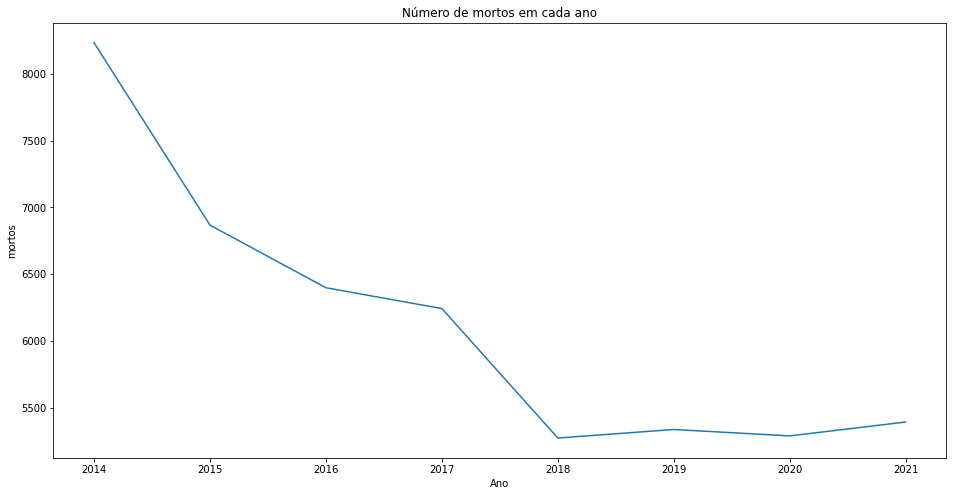

(-0.5, 22.5, 320.0, 172972.8)

In [ ]:
#fig, ax = plt.subplots(figsize=(16, 8))
#fig = sns.lineplot(data=numero_mortos, x = 'ano', y='mortos')
plt.figure(figsize=(16, 8))
p = sns.lineplot(data=numero_mortos, x = 'ano', y = 'mortos')
plt.xlabel('Ano')
plt.title('Número de mortos em cada ano')
plt.show()
fig.axis(ymin=320)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
#ax.set(ylabel="")
#ax.set(xlabel="Ano")
#ax.set(title="Número de mortos por ano")

Distribuição de acidentes em relação ao tipo de pista

In [ ]:
df_acidentes['tipo_pista'].unique()

array(['simples', 'múltipla', 'dupla', '(null)'], dtype=object)

In [ ]:
#df_acidentes.loc[df_acidentes['tipo_pista'] == '(null)', 'tipo_pista'] = 'múltipla'

In [ ]:
tipo_pista = df_acidentes.groupby('tipo_pista')['id'].count().reset_index()

In [ ]:
tipo_pista.rename(columns = {'id':'quantidade', 'tipo_pista':'pista'}, inplace=True)

In [ ]:
tipo_pista.drop(0, axis=0, inplace=True)

In [ ]:
tipo_pista

,pista,quantidade
1,dupla,304970
2,múltipla,56387
3,simples,380199


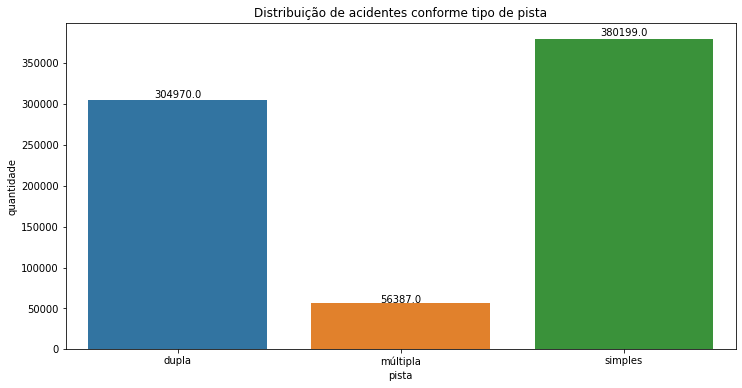

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("Distribuição de acidentes conforme tipo de pista")
p = sns.barplot(data=tipo_pista, x ='pista', y='quantidade')
show_values(p)









Causas mais comuns de acidentes

Os dados nos mostram aqui que o maior causador de acidentes é a falta de atenção.

In [ ]:
causa = df_acidentes.groupby('causa_acidente')['id'].count().to_frame().reset_index()
causa.rename(columns = {'id':'quantidade'}, inplace=True)
#causa_acidente
causa = causa.sort_values(by='quantidade', ascending=False)

([<matplotlib.patches.Wedge at 0x7f19fca1a490>,
 [Text(0.16957561516616532, 1.187957958322186, 'falta de atenção'),
  Text(-1.1453641153354905, -0.3579679361363938, 'outras'),
  Text(-0.19059570841023327, -1.0833620244108622, 'velocidade incompatível'),
  Text(0.6939097552364595, -0.853515818006718, 'não guardar distância de segurança'),
  Text(1.060345992029287, -0.2926881910624812, 'ingestão de álcool')],
 [Text(0.09891910884692977, 0.6929754756879418, '45.5%'),
  Text(-0.6681290672790361, -0.20881462941289636, '18.7%'),
  Text(-0.10396129549649086, -0.5909247405877429, '16.1%'),
  Text(0.3784962301289779, -0.4655540825491189, '11.1%'),
  Text(0.5783705411068837, -0.15964810421589878, '8.6%')])

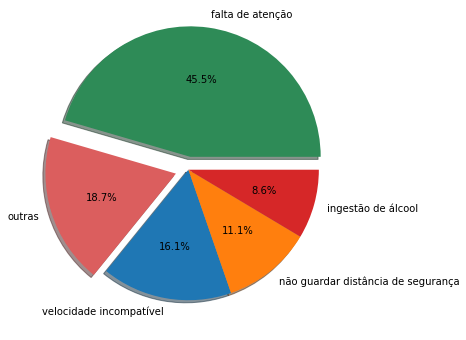

In [ ]:
colors=['seagreen', '#db5e5e', 'tab:blue', 'tab:orange', 'tab:red']
explode = [0.1, 0.1, 0, 0, 0]
plt.figure(figsize=(14, 6))
plt.pie(x=causa['quantidade'][:5], labels=causa['causa_acidente'][:5], autopct='%.1f%%', shadow=True, colors=colors, explode=explode)

As rodovias Federais com o maior número de acidentes no período analisado

In [ ]:
mais_letais = df_acidentes['br'].value_counts().to_frame().reset_index()

In [ ]:
mais_letais.rename(columns={'index':'br', 'br':'quantidade'}, inplace=True)

([<matplotlib.patches.Wedge at 0x7f19fc989710>,
 [Text(0.4598748939212829, 0.9992572651429105, '101'),
  Text(-1.0785482068239185, -0.2161799379149461, '116'),
  Text(0.042885385906834245, -1.099163701945994, '381'),
  Text(0.7158800787107831, -0.8351740614417112, '40'),
  Text(1.0595523170850438, -0.29554845179718836, '153')],
 [Text(0.2508408512297906, 0.5450494173506784, '36.3%'),
  Text(-0.5882990219039556, -0.11791632977178876, '33.8%'),
  Text(0.02339202867645504, -0.5995438374250875, '11.2%'),
  Text(0.39048004293315436, -0.45554948805911516, '10.1%'),
  Text(0.5779376275009329, -0.16120824643482998, '8.7%')])

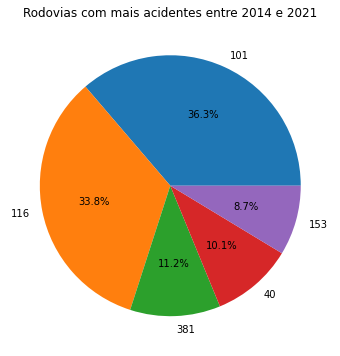

In [ ]:
plt.figure(figsize=(14, 6))
plt.title('Rodovias com mais acidentes entre 2014 e 2021')
plt.pie(x=mais_letais['quantidade'][:5], labels=mais_letais['br'][:5], autopct='%.1f%%')

Dias da semana em que mais ocorreram acidentes no período analisado

In [ ]:
num_dia = df_acidentes['dia_semana'].value_counts(ascending=True).to_frame().reset_index()

In [ ]:
num_dia.rename(columns={'index':'dia_semana', 'dia_semana':'quantidade'}, inplace=True)

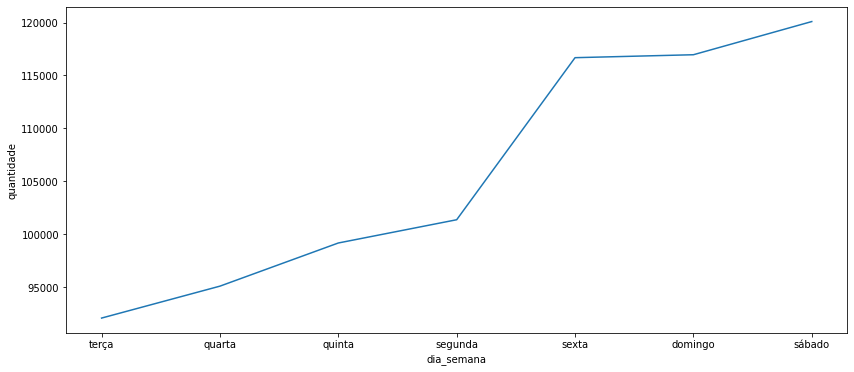

In [ ]:
plt.figure(figsize=(14, 6))
p = sns.lineplot(data = num_dia, x = 'dia_semana', y='quantidade')

Meses em que mais ocorreram acidente por ano (no intervalo de anos pesquisado)
Janeiro e Dezembro são meses que apresentavam um número significativo de acidentes. Em dezembro, o natal é uma festividade que leva a um grande deslocamento de pessoas utilizando veículos e em Janeiro com o Ano Novo o mesmo se repete. É possível verificar que em feriados o número de acidentes aumenta muito.

In [ ]:
df_acidentes['mes'].value_counts().sort_values(ascending=False)

1     66684
12    65997
3     64791
5     63292
4     62105
2     61707
10    60660
6     60365
7     59800
8     59660
9     58597
11    57903
Name: mes, dtype: int64

Aqui começam as análises focadas na BR-101. 

Número de acidentes na rodovia BR-101 em cada um dos anos analisados em nosso estudo (2014-2021)

In [ ]:
rodovia_br_101 = df_acidentes.loc[df_acidentes['br'] == 101]

In [ ]:
br = rodovia_br_101['ano'].value_counts().to_frame().reset_index()

In [ ]:
br.rename(columns = {'index':'ano', 'ano':'quantidade'}, inplace=True)

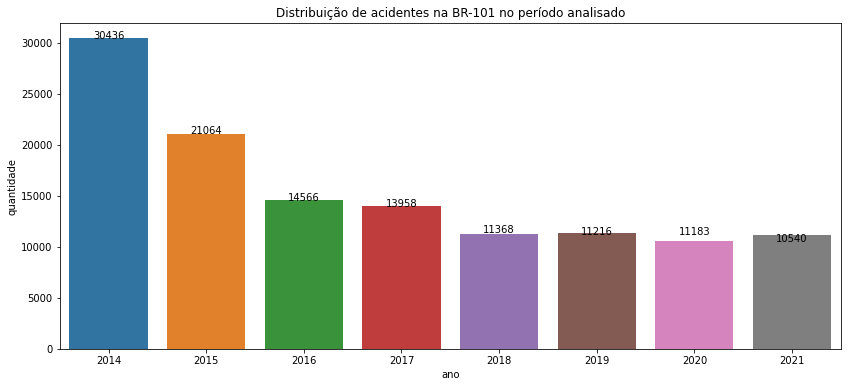

In [ ]:
plt.figure(figsize=(14, 6))
plt.title('Distribuição de acidentes na BR-101 no período analisado')
plt.ylabel('quantidade')
ax = sns.barplot(data=br, x = 'ano', y='quantidade')
addRotulos(br['ano'], br['quantidade'])

Distribuição dos acidentes fatais conforme condição metereológica no período entre 2014 e 2021 na rodovia BR 101

Os dados nos mostram que os acidentes ocorrem mais em dias claros. Um excesso de confiança pode ser a causa desses acidentes.

In [ ]:
idx_condicao = df_acidentes.loc[df_acidentes.br == 101]

In [ ]:
cont_fatais = idx_condicao.groupby('condicao_metereologica')['mortos'].count().reset_index()

In [ ]:
cont_fatais.rename({'mortos':'quantidade'}, axis=1, inplace=True)

In [ ]:
cont_fatais

,condicao_metereologica,quantidade
0,ceu claro,60723
1,chuva,18341
2,garoa/chuvisco,1958
3,granizo,12
4,ignorado,1690
5,neve,5
6,nevoeiro/neblina,562
7,nublado,26629
8,sol,13885
9,vento,526


Text(0.5, 0, 'Condição metereológica')

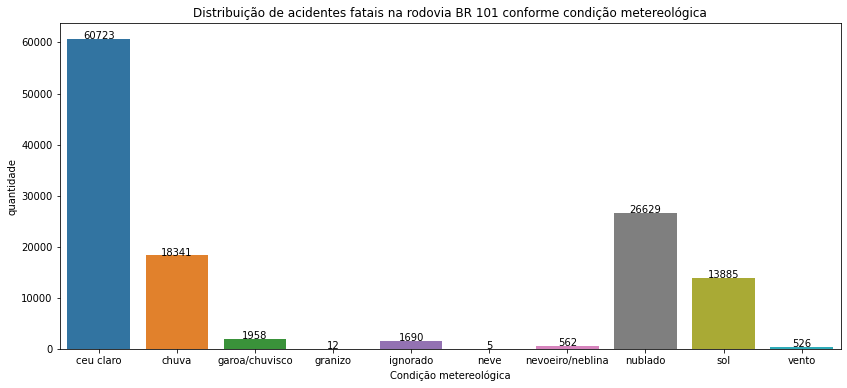

In [ ]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(data = cont_fatais, x = 'condicao_metereologica', y='quantidade')
addRotulos(cont_fatais['condicao_metereologica'], cont_fatais['quantidade'])
plt.title('Distribuição de acidentes fatais na rodovia BR 101 conforme condição metereológica')
plt.xlabel('Condição metereológica')

Evolução do número de mortos e feridos na rodovia BR 101

In [ ]:
idx_evolucao = df_acidentes.loc[df_acidentes.br == 101]

In [ ]:
mortos_feridos = idx_evolucao.groupby('ano')['mortos', 'total_feridos'].sum()

mortos_feridos = mortos_feridos.reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


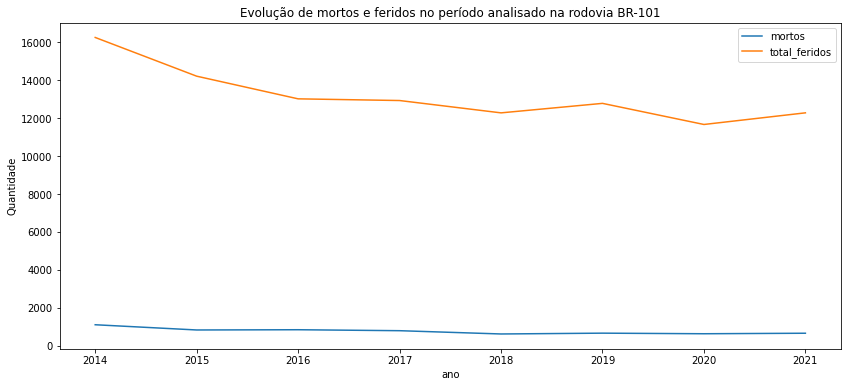

In [ ]:
plt.figure(figsize=(14, 6))
plt.title('Evolução de mortos e feridos no período analisado na rodovia BR-101')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
ax = plt.gca()
mortos_feridos.plot(x = 'ano', y='mortos', ax= ax)
mortos_feridos.plot(x = 'ano', y = 'total_feridos', ax = ax)

Quadro que mostra a distribuição de pessoa e veículos envolvidos em acidentes no período em estudo na rodovia BR-101

In [ ]:
idx_dist = df_acidentes.loc[df_acidentes['br'] == 101]

In [ ]:
quadro_p = idx_dist.groupby('ano')[['pessoas', 'veiculos']].sum().reset_index()

In [ ]:
quadro_p

,ano,pessoas,veiculos
0,2014,65746,56574
1,2015,45564,37635
2,2016,31645,24575
3,2017,30688,23177
4,2018,25856,19105
5,2019,26018,19415
6,2020,23950,17641
7,2021,25655,19047


In [ ]:
ind_ano = np.arange(len(quadro_p['ano']))

In [ ]:
bar_w = 0.35

In [ ]:
trans_p = list(quadro_p['pessoas'].T)

In [ ]:
trans_v = list(quadro_p['veiculos'].T)

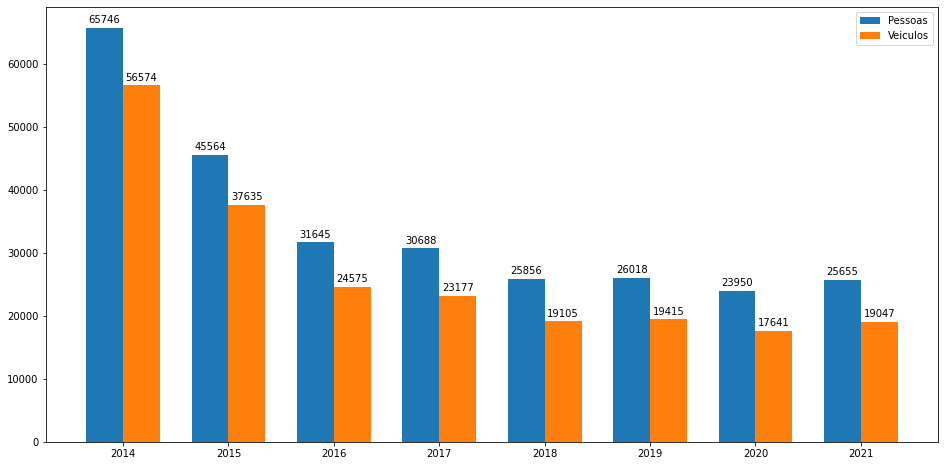

In [ ]:
fig,ax = plt.subplots(figsize=(16, 8))
bar_pessoas = ax.bar(ind_ano - bar_w/2, trans_p, bar_w, label='Pessoas')
bar_veiculos = ax.bar(ind_ano + bar_w/2, trans_v, bar_w, label='Veiculos')
ax.set_xticks(ind_ano)
ax.set_xticklabels(quadro_p['ano'].unique())


def insert_data_labels(bars):
	for bar in bars:
		bar_height = bar.get_height()
		ax.annotate('{0:.0f}'.format(bar.get_height()),
			xy=(bar.get_x() + bar.get_width() / 2, bar_height),
			xytext=(0, 3),
			textcoords='offset points',
			ha='center',
			va='bottom'
		)

insert_data_labels(bar_pessoas)
insert_data_labels(bar_veiculos)

ax.legend()


Número de acidentes conforme traçado da via na rodovia BR-101 no período analisado

In [ ]:
condicao = df_acidentes.loc[(df_acidentes['classificacao_acidente'] == 'com vítimas fatais') & (df_acidentes['br'] == 101)]

In [ ]:
idx_acidentes = condicao['tracado_via'].value_counts()

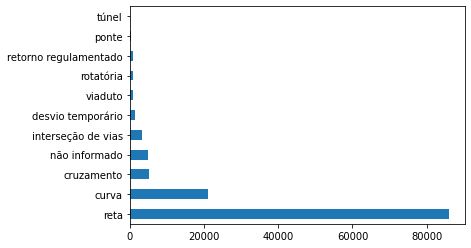

In [ ]:
idx_acidentes.plot.barh()

Quais os quilômetros com a maior quantidade de acidentes na rodovia BR-101?

In [ ]:
idx_rodovia = df_acidentes.loc[df_acidentes['br'] == 101]

In [ ]:
km_mais_perigoso = idx_rodovia['km'].value_counts().nlargest()

In [ ]:
km_mais_perigoso

322.0    604
207.0    537
210.0    525
206.0    488
204.0    486
Name: km, dtype: int64

Distribuição de acidentes na BR-101 nos estados cortados por seu traçado

In [ ]:
idx_uf = df_acidentes.loc[(df_acidentes['br'] == 101) & (df_acidentes['classificacao_acidente'] != 'ignorado')]

In [ ]:
df_uf = idx_uf['uf'].value_counts().to_frame().reset_index()

In [ ]:
df_uf.rename(columns={'index':'uf', 'uf':'quantidade'}, inplace=True)

Text(0, 0.5, 'Acidentes')

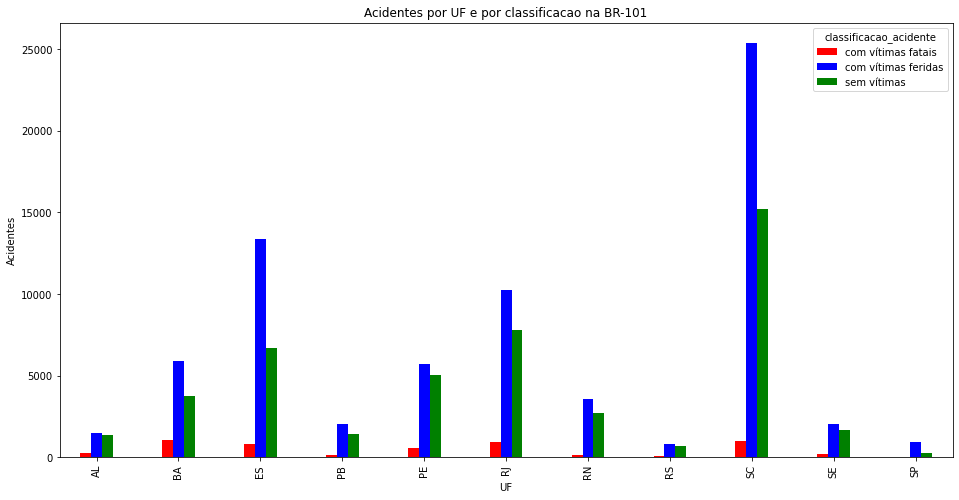

In [ ]:
table = pd.crosstab(idx_uf['uf'], idx_uf['classificacao_acidente'])
table.plot(kind='bar', width=0.4, color=['red', 'blue', 'green'], title='Acidentes por UF e por classificacao na BR-101', figsize=(16,8))
plt.xlabel('UF'),
plt.ylabel('Acidentes')

Uma forma mais clara de visualizar a distribuição de acidentes por ano e por mês na BR 101

In [ ]:
acidentes_na_br = df_acidentes.loc[df_acidentes['br'] == 101]

In [ ]:
import calendar

In [ ]:
acidentes_na_br['mes_ext'] = acidentes_na_br['mes'].apply(lambda x: calendar.month_abbr[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
acidentes_ano_mes = pd.crosstab(acidentes_na_br['mes_ext'], acidentes_na_br['ano'])

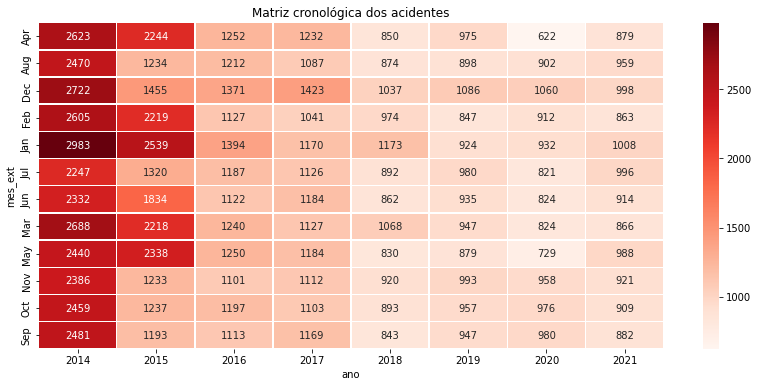

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_title('Matriz cronológica dos acidentes')

sns.heatmap(acidentes_ano_mes, annot=True, fmt="d", linewidths=.5, ax = ax, cmap="Reds")


Aqui irão os gráficos pedidos pelo professor para finalizar o projeto de TCC

In [ ]:
df_mortos = df_acidentes.groupby('ano').agg({'mortos':'sum'}).reset_index()

In [ ]:
df_feridos = df_acidentes.groupby('ano').agg({'feridos':'sum'}).reset_index()

In [ ]:
df_grav = pd.merge(df_mortos, df_feridos)

In [ ]:
df_grav['indice_grav'] = df_grav['mortos'] / df_grav['feridos']

In [ ]:
df_grav

,ano,mortos,feridos,indice_grav
0,2014,8234,100832,0.081661
1,2015,6867,90251,0.076088
2,2016,6398,86672,0.073819
3,2017,6242,84143,0.074183
4,2018,5272,76627,0.068801
5,2019,5336,79119,0.067443
6,2020,5288,71409,0.074052
7,2021,5392,71748,0.075152


Índice de gravidade dos acidentes na BR 101

Esse gráfico mostra a variaçao da gravidade nos anos do estudo. Percebe-se que o ano de 2014 foi o que apresentou o maior índice. Há um aumento na gravidade de 2016 para 2017 e 2019 para 2021.

https://www.portaldotransito.com.br/noticias/fiscalizacao-e-legislacao/estatisticas/mesmo-com-a-pandemia-numero-de-mortes-por-acidentes-de-transito-cresce-no-brasil/

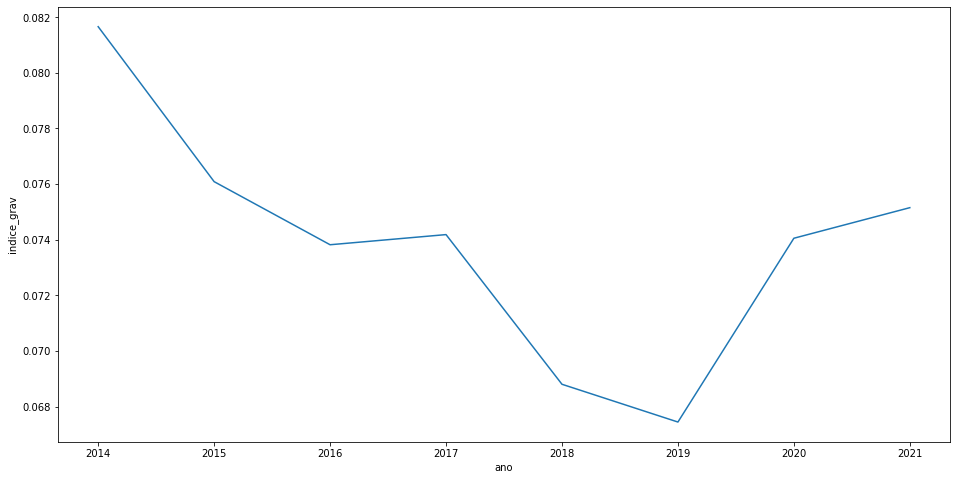

In [ ]:
plt.figure(figsize=(16, 8))

sns.lineplot(data=df_grav, x = 'ano', y = 'indice_grav')

Tipologia dos acidentes ao longo do dia

In [ ]:
import plotly.express as px

Algo me diz que o tipo de gráfico a se utilizar é um spider/radar chart. 
O que queremos é uma classificação dos tipos de acidente com a anotação da frequência por horário registrado no boletim.

https://www.guiadoexcel.com.br/como-criar-grafico-de-radar-no-excel/

https://peltiertech.com/radar-around-the-clock/

In [ ]:
df_acidentes['horario'] = pd.to_datetime(df_acidentes['horario'])

In [ ]:
df_acidentes['hora'] = df_acidentes['horario'].dt.hour

Tipologia dos acidentes (padronizada)

In [ ]:
df_acidentes['tipo_acidente'].unique()

array(['atropelamento de pessoa', 'colisão com objeto fixo',
       'saída de pista', 'colisão traseira', 'colisão transversal',
       'atropelamento de animal', 'colisão frontal', 'incêndio',
       'colisão lateral', 'queda de motocicleta / bicicleta / veículo',
       'capotamento', 'tombamento', 'colisão com bicicleta',
       'colisão com objeto móvel', 'derramamento de carga',
       'danos eventuais', 'queda de ocupante de veículo',
       'colisão com objeto estático', 'saída de leito carroçável',
       'atropelamento de pedestre', 'colisão com objeto em movimento',
       'engavetamento', 'outros', 'colisão lateral mesmo sentido',
       'eventos atípicos', 'colisão com objeto',
       'colisão lateral sentido oposto'], dtype=object)

In [ ]:
df_acidentes.replace({'tipo_acidente':{'atropelamento de pessoa':'atropelamento', 'atropelamento de animal':'atropelamento', 'colisão transversal':'colisão lateral', 'atropelamento de pedestre':'atropelamento'}}, inplace=True)

In [ ]:
estat_atropelamento = df_acidentes.loc[(df_acidentes['tipo_acidente'] == 'atropelamento') & (df_acidentes['br'] == 101)]

In [ ]:
atrop = estat_atropelamento.groupby('hora')['tipo_acidente'].count().reset_index()

In [ ]:
atrop.rename(columns = {'index':'hora', 'tipo_acidente':'quantidade'}, inplace=True)

In [49]:
atrop

,hora,quantidade
0,0,222
1,1,194
2,2,142
3,3,144
4,4,222
5,5,211
6,6,186
7,7,215
8,8,201
9,9,203


In [ ]:
atrop.to_excel('planilha.xlsx')